### Movie Recommendation System


In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Get the Dataset

In [3]:
# you must be wondering why read csv even when its not csv file
# you just need to change one thing, its tab separated file
df = pd.read_csv("ml-100k/u.data", sep='\t', header=None)

In [4]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
# give column names, given in docs of this file
columns_names = ["user_id", "item_id", "rating", "timestamps"]
df = pd.read_csv("ml-100k/u.data", sep='\t', names=columns_names)
df.head()


,user_id,item_id,rating,timestamps
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
# check unique users
df['user_id'].nunique()

943

In [8]:
# number of unique movies
df['item_id'].nunique()

1682

In [9]:
# to know the name of movie we are using another file
movies_titles = pd.read_csv("ml-100k/u.item", sep='|', header=None, encoding='latin-1')

In [10]:
#movies_titles = movies_titles[[0,1]]
movies_titles.shape

(1682, 24)

In [11]:
movies_titles = movies_titles[[0,1]]
movies_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
movies_titles.columns = ['item_id', 'title']

In [13]:
# both our df has item_id, so we gonna merge, 4th column would be
# movie corresponding to item_id in first df
df = pd.merge(df, movies_titles, on='item_id')
df.tail()


,user_id,item_id,rating,timestamps,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt

In [15]:
# average rating of a movie
df.groupby('title').mean()
# we are concerned about rating for now, discard all

,user_id,item_id,rating,timestamps
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [16]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)
'''no movie is perfect so getting 5 is not possible so
we discard movies with 5 stars as very less people have watched it'''

'no movie is perfect so getting 5 is not possible so\nwe discard movies with 5 stars as very less people have watched it'

In [17]:
# how many rating this movie got
df.groupby('title').count()
''' rated how many times'''

' rated how many times'

In [18]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [19]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [20]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])
ratings

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [22]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


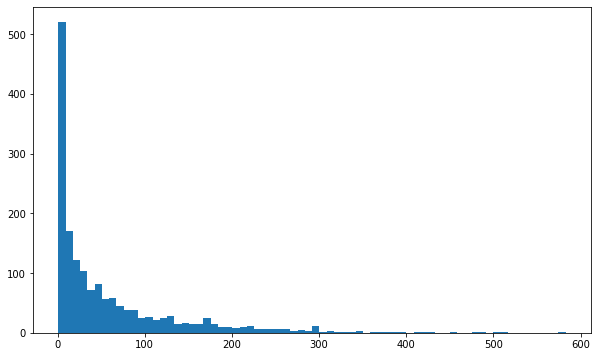

In [23]:
# to check the distribution of how many starts each movie are rated
# by how many people, so we plot histogram

plt.figure(figsize=(10,6))
plt.hist(ratings['number of ratings'], bins=70)
plt.show()

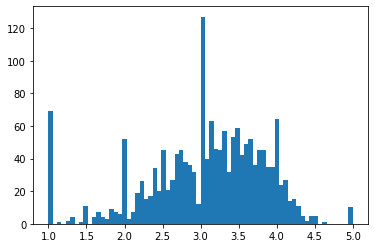

In [24]:
# histogram of rating
plt.hist(ratings['rating'], bins=70)
plt.show()
# its looks normal distribution, real life data set

In [25]:
# joint plot between number of rating and actual rating
sns.jointplot(x='rating' , y='number of ratings' , data=ratings, alpha = 0.5)

NameError: name 'sns' is not defined

## Creating Movie Recommendation

In [26]:
df.head()

,user_id,item_id,rating,timestamps,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [27]:
# create matrix, rows have user_is and columns as titles of movies
# so each cell would contain rating of user to that movie
# gonna use panda function

moviemat = df.pivot_table(index="user_id", columns='title', values='rating')

In [28]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [29]:
ratings.sort_values(by='number of ratings', ascending=False)

,rating,number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [30]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [31]:
# we can correlate user rating of star wars with all other movies
moviemat.corrwith(starwars_user_ratings)

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [32]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [33]:
# NaN values mean that there was no person who rated both movies
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [34]:
# drop all NaN values
corr_starwars.dropna(inplace=True)

In [35]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [36]:
# you want to recommend a movie so suggest movie with highest correlation
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [42]:
# 1 means highly correlated, 
""" so 583 people have rated star wars out of which 
500 rated 5stars
and other movie has corr with star wars 1, then another movie
has just 6 people rated it 5 and also rated star wars 5, so highly
correlated, but here the number of users is very less 
So we want to put a threshold looking at histogram, only recommend
movies with rated by atleast 100 people, only then consider.
One movie has 1 correlation with itself"""
# join 2 df corrstarwars with ratings, since index is same
corr_starwars = corr_starwars.join(ratings['number of ratings'])
corr_starwars

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [43]:
corr_starwars[corr_starwars['number of ratings'] > 100].sort_values('Correlation', ascending=False)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [49]:
def predict_movies(movie_name):
    # from matrix get user and its rating for this movie
    movie_user_rating = moviemat[movie_name]
    # find correlation with all other movies
    similar_to_movie = moviemat.corrwith(movie_user_rating)
    # drop NaN values and make data frame
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    # join this df with ratings
    corr_movie = corr_movie.join(ratings['number of ratings'])
    predictions = corr_movie[corr_movie['number of ratings'] > 100].sort_values('Correlation', ascending=False)
    
    return predictions

In [50]:
predictions = predict_movies("Titanic (1997)")

In [51]:
predictions.head()

,Correlation,number of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
